# Horizontal Plots & Key Grid


## Functions

### Color


In [ ]:
def colormaker(number:int,custom_pal=None,desat_level:float=0.5):
    """Create Colors

    Args:
        number (int): The number of colors to create.
        custom_pal (typically tuple, optional): Can supply specific color choices. Defaults to None.
        desat_level (float, optional): Desaturation level. Defaults to 0.5.
    Returns:
        lists: Two lists with the color palette before and after desaturation.
    """

    import seaborn as sns
    import matplotlib.pyplot as plt 

    # If no custom palette is provided, use the default seaborn palette
    if custom_pal is None:
        colors = sns.color_palette(n_colors=number)
    # If a tuple is provided, check it is the right length
    elif isinstance(custom_pal, tuple):
        if len(custom_pal) != number:
            raise ValueError('Number of colors inputted does not equal number of samples')
        else:
            colors = custom_pal
    # If a string is provided, check it is a matplotlib palette
    elif isinstance(custom_pal, str):
        # check it is in the list of matplotlib palettes.
        if custom_pal in plt.colormaps():
            colors = sns.color_palette(custom_pal, number)
        else:
            raise ValueError('The specified `custom_palette` {} is not a matplotlib palette. Please check.'.format(custom_pal))
    else:
        raise TypeError('Incorrect color input format')

    # Desaturate the colors
    desat_colors = [sns.desaturate(c, desat_level) for c in colors] 
    return colors,desat_colors

### Key Grid & Plotter

In [ ]:
def key_grid(df, ind_var:str):
    """ This function creates the keygrid data
    Args:
        df (Dataframe): The Inputted dataframe in melted format. One column for paired index (0,0,1,1 etc), one for genotype, one for the dependent variable, and one for paired condition.
        ind_var (string): The column name for independent variable - Typically will be 'Genotype'.
    Raises:
        ValueError: _description_
    Returns:
        df: Dataframe with added keygrid.
        Constructs: List of the constructs/genetic elements used.
    """
    # Create a copy of the dataframe
    df1=df.copy()
    # Initialise variable
    idx = 1
    geno_out = 1
    constructs = []
    # Loop to get each construct used
    while geno_out != '0':
        geno_out = input("Enter each construct used. To break loop enter '0': ")
        idx += 1
        constructs.append(geno_out)
    constructs = constructs[:-1]
    print('For the experiment, the construct(s) you have supplied are {}'.format(constructs))

    ## Matching constructs to genotype
    # Loop to get each genotype
    for idx, geno in enumerate(df1[ind_var].unique()):
        print('For experiment: {}, the provided genotype name is {}'.format(idx+1, geno))
        geno_all = []
        # Loop to get each construct
        for construct in constructs:
            yesno = input("Is {} present in {}. Y for yes, N for no".format(construct,geno))
            # If construct is present, set variable to 1
            if yesno.lower() == 'y':
                df1.loc[(df1[ind_var] == geno), [construct]] = 1
                geno_all.append(construct)
            # If construct is not present, set variable to 0
            elif yesno.lower() == 'n':
                df1.loc[(df1[ind_var] == geno), [construct]] = 0
            else:
                raise ValueError('Mistyped Y or N for the construct')
        print('You have suggested this genotype contains: {}'.format(geno_all))
        print("-"*60)
    yesno = input("Were these genotypes and their constructs typed correctly?. Y for yes, N for no")
    if yesno.lower() == 'n':
        raise ValueError('Try again :)')
    return df1,constructs


def grid_key_plotter(axes, df, order:tuple, ind_var:str, constructs:list, pair_title:str,paired:bool=True,custom_pal=None,
                    grid_key_grid_color='black', grid_key_marker_size:int = 10, grid_key_font_size:int = 10, grid_key_labels_xpos:int=0.8, grid_key_opacity=1,grid_key_marker_desat=True):
    """Key Grid Plotter

    Args:
        axes (axis): The axis to be plotted on to.
        df (DataFrame): The dataframe with Keygrid data. Melted format.
        order (tuple): The order of the genotypes used in the experiment.
        ind_var (str): The column name for the indepedent variable. 
        constructs (list): List of column names for the Key Grid data. 
        pair_title (str): Paired data column Name.
        paired (bool, optional): Is the data paired?. Defaults to True.
        custom_pal (list/tuple): Can provide color palette. Defaults to None.
        grid_key_grid_color (str, optional): Color of the Grid lines. Defaults to 'black'.
        grid_key_marker_size (int, optional): Marker size for the dots. Defaults to 10.
        grid_key_font_size (int, optional): Font size. Defaults to 10.
        grid_key_labels_xpos (int, optional): The relative X-Position of the construct labels. Can adjust: typically between 0.5-0.8. Defaults to 0.8.
        grid_key_opacity (int, optional): Opacity for the Grid lines. Defaults to 1.
        grid_key_marker_desat (bool, optional): Whether to use desat colors for the markers. Defaults to True.
    """
    # Import Module(s) & Basic info
    import numpy as np
    Num_Exps=len(order)
    colors,desat_colors = colormaker(number=Num_Exps,custom_pal=custom_pal)

    ## Create Labels for X-Axis
    labels = constructs.copy()
    labels.insert(0,'N')
    if paired == True:
        labels.append(pair_title) 

    ## Plotting the Grid
    for y in range(0,Num_Exps+1):
        axes.plot([0, len(labels)], [y, y],color=grid_key_grid_color, linewidth = 1,alpha=grid_key_opacity,zorder=3)
    for x in range(0,len(labels)+1):
        axes.plot([x, x], [0, Num_Exps],color=grid_key_grid_color, linewidth = 1,alpha=grid_key_opacity,zorder=3)   
    if paired == True:
        for y in np.arange(0.5,Num_Exps,0.5):
            axes.plot([len(labels)-1,len(labels)], [y,y],color=grid_key_grid_color, linewidth = 1,alpha=grid_key_opacity,zorder=3) 

    ## Plotting the Dot
    for ypos, (genotype, color) in enumerate(zip(order,colors if grid_key_marker_desat==False else desat_colors)):
        exp = df[df[ind_var] == genotype].iloc[:,-(len(constructs)):]
        for xpos in np.arange(0,len(constructs),1):
            if exp.iloc[0,xpos] > 0:
                axes.plot(xpos+1.5,ypos+0.5, marker="o",color=color,markersize = grid_key_marker_size,zorder=5)
            if paired == True:
                axes.plot(len(labels)-0.5,ypos+0.25, marker="o",color=color,markersize = grid_key_marker_size,zorder=5)

    ## Plotting Sample Size in the Key Grid
    for x,genotype in zip(np.arange(0.5,Num_Exps,1),order):
        axes.text(0.5, x,int(len(df[df[ind_var] == genotype])/2),color='black', fontsize=grid_key_font_size,verticalalignment='center', horizontalalignment='center',)

    ## Set Parameters for X & Y axes
    axes.tick_params(left=False,bottom=False,axis='x', which='major', pad=-2)
    axes.spines[['top','right','left']].set_color('none')
    axes.set_xticks(np.arange(grid_key_labels_xpos,len(labels),1))
    axes.set_xticklabels(labels,rotation = 45, ha = 'right', fontsize = 10)
    axes.set_xlim(0, len(labels)+0.05)
    axes.set_yticks([])
    axes.set_ylim(0, Num_Exps)

### Swarm/Paired Plotter

In [ ]:
def swarm_plotter(axes, df, order, ind_var, dep_var, pair_col_name, condition:tuple, custom_pal=None, grid_key=False,
                  line_alpha=0.1, swarm_marker_size=3, dot_alpha=0.5, mean_alpha=0.8,dot = True, swarm_xlim:tuple = None, swarm_axis_title=None, 
                  swarm_font_size=15,swarm_ytick_labels=None,ytick_labels_samplesize=None):
    """The swarm/paired plot plotter

    Args:
        axes (axis object): The subplot axes it will be plotted on
        df (Dataframe): The Inputted dataframe in melted format. One column for paired index (0,0,1,1 etc), one for genotype, one for the dependent variable, and one for paired condition.  
        order (tuple): Input the order of the genotypes to plot - Must be tuple/list of strings with same names as in the genotype column of the dataframe.
        ind_var (string): The column name for independent variable - Typically will be 'Genotype'.
        dep_var (str): The column name for depedent variable.
        pair_col_name (str): The column name for paired condition.
        condition (tuple): Tuple/List of two strings for the data within the paired condition column, in the order you want to analyse. Eg. ('Off', 'On').
        custom_pal (list/tuple): Can provide color palette. Defaults to None.
        grid_key (bool): Whether the grid_key is included in the main plot.
        line_alpha (float, optional): The alpha for the swarmplot lines. Defaults to 0.1.
        swarm_marker_size (int, optional): The dot size for the swarmplot dots. Defaults to 3.
        dot_alpha (float, optional): The alpha for the swarmplot dots. Defaults to 0.5.
        dot (bool, optional): Include dots in the swarmplot?. Defaults to True.
        swarm_xlim (tuple, optional): The swarm plot X range. Defaults to None.
        swarm_axis_title (str, optional): Title for the swarm plot. Defaults to None.
        swarm_font_size (int, optional): The font size for the swarmplot. Defaults to 15.
        swarm_ytick_labels (tuple(Str)): The labels for Y-Axis if grid_key=False.
        ytick_labels_samplesize (bool): Whether to show sample size with the labels. 
    """
    ## Import Modules(s) & basic info
    import numpy as np
    Num_Exps=len(order)    
    colors,desat_colors = colormaker(number=Num_Exps,custom_pal=custom_pal)

    ## Create the data tuples & Mean + SD tuples
    output_x, output_y=[],[]
    means,sd=[],[]
    for genotype,ydiff1,ydiff2 in zip(order,np.arange(0.75,Num_Exps,1),np.arange(0.25,Num_Exps,1)):
        data = df[df[ind_var] == genotype]
        output_x.append(np.array([data[data[pair_col_name].str.contains(condition[0])][dep_var],data[data[pair_col_name].str.contains(condition[1])][dep_var]]))
        output_y.append(np.array([int((len(data)/2))*[ydiff1],int((len(data)/2))*[ydiff2]]))

        means.append(np.array([data[data[pair_col_name].str.contains(condition[0])][dep_var].mean(),data[data[pair_col_name].str.contains(condition[1])][dep_var].mean()]))
        sd.append(np.array([data[data[pair_col_name].str.contains(condition[0])][dep_var].std(),data[data[pair_col_name].str.contains(condition[1])][dep_var].std()]))

    ## Plot the pairs of data
    for x, y, c in zip(output_x,output_y,colors):  
        axes.plot(x, y,color=c, alpha=line_alpha)

    ## Plot dots for each pair of data
    if dot==True:
        for genotype,y in zip(order,np.arange(0,Num_Exps,1)):
            data = df[df[ind_var] == genotype]
            off = data[data[pair_col_name].str.contains(condition[0])][dep_var]
            on = data[data[pair_col_name].str.contains(condition[1])][dep_var]
            axes.plot(on,len(on)*[(0.25)+y], 'o',color=desat_colors[y],markersize = swarm_marker_size,alpha=dot_alpha)
            axes.plot(off,len(off)*[(0.75)+y],'o',color=desat_colors[y], markersize = swarm_marker_size,alpha=dot_alpha)  

    ## Plot Mean & SD tuples
    for m,c in zip(np.arange(0,Num_Exps,1),desat_colors):
        axes.plot(means[m][0],m+0.88, marker="s",color='white',markersize = 3,zorder=5)
        axes.plot(means[m][1],m+0.12, marker="s",color='white',markersize = 3,zorder=5)

        axes.plot([means[m][0]-sd[m][0], means[m][0]+sd[m][0]], [m+0.88, m+0.88],color=c, alpha=mean_alpha, linewidth = 2.5,zorder=3)
        axes.plot([means[m][1]-sd[m][1], means[m][1]+sd[m][1]], [m+0.13, m+0.13],color=c, alpha=mean_alpha,linewidth = 2.5,zorder=3)

    ## Parameters for X & Y axes
    axes.set_ylim(0, Num_Exps)
    axes.tick_params(left=True)

    if grid_key==False:
        axes.set_yticks(np.arange(0.5,Num_Exps,1))
        
        yticklabels=[]
        if swarm_ytick_labels==None:
            for n in np.arange(0,Num_Exps,1):
                yticklabels.append('Experiment '+ str(n))
        else:
            for n,x,genotype in zip(np.arange(0,Num_Exps,1),np.arange(0.5,Num_Exps,1),order):
                if  ytick_labels_samplesize == True:
                    data = df[df[ind_var] == genotype]
                    ss=int(len(data)/2)
                    yticklabels.append(swarm_ytick_labels[n]+'\n'+'n= '+str(ss))
                else:
                    yticklabels.append(swarm_ytick_labels[n])
        axes.set_yticklabels(yticklabels,ma='center')
        axes.spines[['top', 'right']].set_color(None)

    else:
        axes.set_yticks([])
        axes.spines[['top', 'right','left']].set_color(None)

    if swarm_axis_title != None:
        axes.set_xlabel(swarm_axis_title, fontsize = swarm_font_size)
    else:
        axes.set_xlabel('Variable', fontsize = swarm_font_size)

    if swarm_xlim != None:
        axes.set_xlim(swarm_xlim[0], swarm_xlim[1])

### Violin Plotter

In [ ]:
def violin_plotter(axes, df, order, ind_var, dep_var, pair_col_name, condition:tuple, idcol, 
                   custom_pal=None, mean_marker_size=20, contrast_axis_title=None, contrast_font_size=15, contrast_xlim=None):
    """ Function to plot horizontal violinplots 

    Args:
        axes (axis object): The subplot axes it will be plotted on.
        df (Dataframe): The Inputted dataframe in melted format. One column for paired index (0,0,1,1 etc), one for genotype, one for the dependent variable, and one for paired condition.  
        order (tuple): Input the order of the genotypes to plot - Must be tuple/list of strings with same names as in the genotype column of the dataframe.
        ind_var (string): The column name for independent variable - Typically will be 'Genotype'.
        dep_var (str): The column name for depedent variable.
        pair_col_name (str): The column name for paired condition.
        condition (tuple): Tuple/List of two strings for the data within the paired condition column, in the order you want to analyse. Eg. ('Off', 'On').
        idcol (str): The column name for index type column containing the pairs of experiment (Eg. 0,0,1,1 etc).
        custom_pal (list/tuple): Can provide color palette. Defaults to None.
        mean_marker_size (int, optional): The size for the violin plot mean dot. Defaults to 20.
        contrast_axis_title (tuple, optional): Title for the violin plot. Defaults to None.
        contrast_font_size (int, optional): The font size for the violin plot. Defaults to 15.
        contrast_xlim (tuple, optional): The violin plot X range. Defaults to None.

    Returns:
        contrasts (list): list of the dabest contrasts.
    """    
    ## Import Modules(s) & basic info
    import numpy as np
    import dabest
    from dabest import plot_tools
    Num_Exps=len(order) 
    colors,desat_colors = colormaker(number=Num_Exps,custom_pal=custom_pal)
    
    ## Create the dabest data for curves
    contrasts = []
    for genotype in order:
        data = df[df[ind_var] == genotype]
        contrasts.append(dabest.load(data, idx=(condition[0], condition[1]),x=pair_col_name, y=dep_var,paired="sequential", id_col=idcol))
    Dbootstraps = [c.mean_diff.results.bootstraps[0] for c in contrasts]

    ## Plot the voilin curves
    default_violinplot_kwargs = {'widths':1, 'vert':False,'showextrema':False, 'showmedians':False, 'positions': np.arange(0.25,Num_Exps,1)}
    v = axes.violinplot(Dbootstraps, **default_violinplot_kwargs)
    dabest.plot_tools.halfviolin(v,  half='top', alpha = 0.4)
    for n,c in zip(np.arange(0,Num_Exps,1),colors):
        axes.collections[n].set_fc(c)

    ## Plot the mean and CIs    
    for x,y in zip(contrasts,np.arange(0.25,Num_Exps+1,1)):
        axes.plot(x.mean_diff.results.difference[0],y, 'k.', markersize = mean_marker_size)
        axes.plot([x.mean_diff.results.bca_low[0], x.mean_diff.results.bca_high[0]], [y, y],'k', linewidth = 2.5)
    axes.plot([0, 0], [0, Num_Exps], 'k', linewidth = 1)
    if contrast_axis_title != None:
        axes.set_xlabel(contrast_axis_title, fontsize = contrast_font_size)
    else:
        axes.set_xlabel('Δ Variable', fontsize = contrast_font_size)

    if contrast_xlim != None:
        axes.set_xlim(contrast_xlim[0], contrast_xlim[1])

    ## Parameters for X & Y axes
    axes.set_ylim(0, Num_Exps)
    axes.set_yticks([])
    axes.tick_params(left=False)
    axes.spines[['top','right','left']].set_color(None)   
    return contrasts

### Table Plotter

In [ ]:
def table_plotter(axes, contrasts, table_font_size):
    """Function to plot the delta table

    Args:
        axes (axis object): The subplot axes it will be plotted on
        contrasts (list): list of the dabest contrasts
        table_font_size (int, optional): The font size for the delta table. Defaults to 15.
    """    
    ## Import Modules(s) & basic info
    import pandas as pd
    
    ## Create a table of deltas
    cols=['Δ','N']
    lst = []
    for x in contrasts:
            lst.append([x.mean_diff.results.difference[0],0])
    tab = pd.DataFrame(lst, columns=cols)

    ## Plot the background color
    axes.axvspan(0, 1, facecolor='0.2', alpha=0.2)  

    ## Plot the text
    for i in tab.index:
        axes.text(0.5, i+0.5, "{:+.2f}".format(tab.iloc[i,0]),ha="center", va="center", color="black")

    ## Parameters for X & Y axes  
    axes.set_yticks([])
    axes.set_ylim(0, len(contrasts))
    axes.tick_params(left=False, bottom=False)
    axes.spines[['top','bottom','right','left']].set_color(None)
    axes.set_xticks([0.5])
    axes.set_xticklabels(["Δ"],rotation = 0, ha = 'center', fontsize = table_font_size)

## Horizontal Plot

In [ ]:
def Horizontal_Plot(df,order:tuple,ind_var:str,dep_var:str, pair_col_name:str, condition:tuple, idcol:str,paired:bool=True, pair_title:str = None,

    grid_key:bool=False,constructs:list = None,grid_key_font_size:int = 10,grid_key_marker_size:int = 10,grid_key_grid_color:str = 'black',
    grid_key_labels_xpos:float=0.8,grid_key_opacity:float=1,grid_key_marker_desat:bool=True,

    swarm_axis_title:str = None,swarm_xlim:tuple = None,dot:bool = True,dot_alpha:float = 0.5, line_alpha:float = 0.1,swarm_marker_size = 3, swarm_font_size:int = 15,

    contrast_axis_title:tuple = None,contrast_xlim:tuple = None, mean_marker_size:int = 20, contrast_font_size:int = 15,table_font_size:int = 15,

    figsize:tuple=(10,4),main_width_ratio:tuple = (1.5,1), main_wspace:float = 0.05, subplot1_width_ratio:tuple = (1,2.5), subplot2_width_ratio:tuple = (3,1), 
    subplot1_wspace:float = 0,subplot2_wspace:float = 0,custom_pal:tuple=None,ytick_labels=None,ytick_labels_samplesize:bool=True,):
    """Horizontal dabest-like plot

    Args:
        df (dataframe): The Inputted dataframe in melted format. One column for paired index (0,0,1,1 etc), one for genotype, one for the dependent variable, and one for paired condition.
        order (tuple): Input the order of the genotypes to plot - Must be tuple/list of strings with same names as in the genotype column of the dataframe.
        ind_var (str): The column name for independent variable - Typically will be 'Genotype'.
        dep_var (str): The column name for depedent variable.
        pair_col_name (str): The column name for paired condition.
        condition (tuple): Tuple/List of two strings for the data within the paired condition column, in the order you want to analyse. Eg. ('Off', 'On').
        idcol (str): The column name for index type column containing the pairs of experiment (Eg. 0,0,1,1 etc).
        paired (bool, optional): Is the data paired?. Defaults to True.
        pair_title (str, optional): The name you choose to describe the paired condition for the grid key label. Defaults to None.
        grid_key (bool, optional): Whether the grid_key is included in the main plot. Defaults to False.
        constructs (list, optional): List of column names for the Key Grid data. 
        grid_key_font_size (int, optional): Font size. Defaults to 10.
        grid_key_marker_size (int, optional): Marker size for the dots. Defaults to 10.
        grid_key_grid_color (str, optional): Color of the Grid lines. Defaults to 'black'.
        grid_key_labels_xpos (float, optional): The relative X-Position of the construct labels. Can adjust: typically between 0.5-0.8. Defaults to 0.8.
        grid_key_opacity (float, optional): Opacity for the Grid lines. Defaults to 1.
        grid_key_marker_desat (bool, optional): Whether to use desat colors for the markers. Defaults to True.
        swarm_axis_title (str, optional): Title for the swarm plot. Defaults to None.
        swarm_xlim (tuple, optional): The swarm plot X-range. Defaults to None.
        dot (bool, optional): Include dots in the swarmplot?. Defaults to True.
        dot_alpha (float, optional): The alpha for the swarmplot dots. Defaults to 0.5.
        line_alpha (float, optional): The alpha for the swarmplot lines. Defaults to 0.1.
        swarm_marker_size (int, optional): The dot size for the swarmplot dots. Defaults to 3.
        swarm_font_size (int, optional): The font size for the swarmplot. Defaults to 15.
        contrast_axis_title (tuple, optional): Title for the violin plot. Defaults to None.
        contrast_xlim (tuple, optional): The violin plot X-range. Defaults to None.
        mean_marker_size (int, optional): The size for the violin plot mean dot. Defaults to 20.
        contrast_font_size (int, optional): The font size for the violin plot. Defaults to 15.
        table_font_size (int, optional): The font size for the delta table. Defaults to 15.
        figsize (tuple, optional): The size of the figure. Defaults to (10, 4).
        main_width_ratio (tuple, optional): The width ratio between the two major subplots. Defaults to (1.5,1).
        main_wspace (float, optional): The white space between the two major subplots. Defaults to 0.05.
        subplot1_width_ratio (tuple, optional): The width ratio between the first two minor subplots. Defaults to (1,2.5).
        subplot2_width_ratio (tuple, optional): The width ratio between the second two minor subplots. Defaults to (3,1).
        subplot1_wspace (float, optional): The white space between the first two minor subplots. Defaults to 0.
        subplot2_wspace (float, optional): The white space between the second two minor subplots. Defaults to 0.
        custom_pal (tuple/str/list, optional): Can provide color palette. Defaults to None.
        ytick_labels (_type_, optional): The labels for Y-Axis if grid_key=False.
        ytick_labels_samplesize (bool, optional): Whether to show sample size with the labels. 

    Raises:
        ValueError: Must provide constructs as a list of constructs used as per the column names.

    Returns:
        fig object: figure
    """

    # Import Modules & Create Parameters
    import matplotlib.pyplot as plt 
    from matplotlib import gridspec
    import seaborn as sns
    import matplotlib as mpl
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    # mpl.rcParams['font.family'] = font

    ## Create variable of number of experiments performed
    Num_Exps = len(order)
    
    ## Colors
    colors,desat_colors = colormaker(number=Num_Exps,custom_pal=custom_pal)

    # Create the Figure
    fig = plt.figure(figsize = figsize)
    gs0 = gridspec.GridSpec(1, 2, width_ratios=main_width_ratio, wspace=main_wspace,) 
    if grid_key==True:
        gs00 = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs0[0],width_ratios=subplot1_width_ratio, wspace=subplot1_wspace)
    else: 
        gs00 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gs0[0])
    gs01 = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs0[1],width_ratios=subplot2_width_ratio, wspace=subplot2_wspace)  


    # Key Grid Subplot
    ## Begin the subplot
    if grid_key==True:
        axk = fig.add_subplot(gs00[0])

        ## Create the Key Grid data
        if constructs == None:
            raise ValueError('Must provide constructs as a list of constructs used as per the column names')
        else:
            df1=df.copy()

        ## Plot the Key Grid
        grid_key_plotter(axk, df1, order=order, ind_var=ind_var, constructs=constructs, pair_title=pair_title if pair_title != None else pair_col_name,paired=paired,custom_pal=custom_pal,
                                grid_key_grid_color=grid_key_grid_color, grid_key_marker_size=grid_key_marker_size, grid_key_font_size=grid_key_font_size,
                                grid_key_labels_xpos=grid_key_labels_xpos, grid_key_opacity=grid_key_opacity,grid_key_marker_desat=grid_key_marker_desat)

    #Swarm plot Subplot
    ## Begin the subplot
    if grid_key==True:
        ax = fig.add_subplot(gs00[1])
    else:
        ax = fig.add_subplot(gs00[0])
        ax.spines[['left']].set_color('black')

    ## Plot the swarm data
    swarm_plotter(ax,df, order=order, ind_var=ind_var, dep_var=dep_var, pair_col_name=pair_col_name, condition=condition, custom_pal=custom_pal,
                line_alpha=line_alpha, swarm_marker_size=swarm_marker_size,dot_alpha=dot_alpha, dot=dot, swarm_xlim=swarm_xlim, swarm_axis_title=swarm_axis_title, 
                swarm_font_size=swarm_font_size,swarm_ytick_labels=ytick_labels,ytick_labels_samplesize=ytick_labels_samplesize,grid_key=grid_key)

    # Violin Plot / Contrast Axis
    ## Begin the subplot
    ax1 = fig.add_subplot(gs01[0])

    ## Plot the Violins
    contrasts = violin_plotter(ax1, df, order=order, ind_var=ind_var, dep_var=dep_var, pair_col_name=pair_col_name, condition=condition, idcol=idcol, custom_pal=custom_pal,
                mean_marker_size=mean_marker_size, contrast_axis_title=contrast_axis_title, contrast_font_size=contrast_font_size, contrast_xlim=contrast_xlim)

    # Table    
    ## Begin the subplot
    ax2 = fig.add_subplot(gs01[1])

    ## Plot the Table
    table_plotter(ax2, contrasts=contrasts, table_font_size=table_font_size)
    
    return fig
    

## Data Import

In [ ]:
import pandas as pd
import os
from nbdev.showdoc import* 

df = pd.read_csv('https://raw.githubusercontent.com/JAnns98/JonnyDataFiles/main/OK371_Example.csv')
print(df.head(5))

   Fly Light     Value   Genotype
0    0    On  0.293243  OK371 ACR
1    0   Off  0.716568  OK371 ACR
2    2    On  0.052326  OK371 ACR
3    2   Off  2.464670  OK371 ACR
4    3    On  1.270908  OK371 ACR


## Plots

### Plotting Without key grid

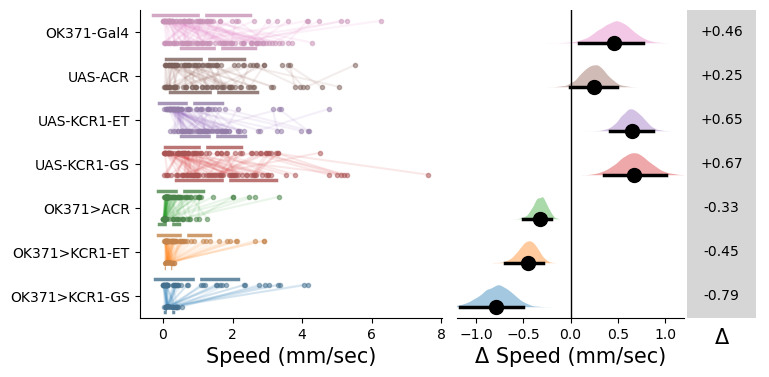

In [ ]:
fig = Horizontal_Plot(df.fillna(0),order=('OK371 KCR1GS', 'OK371 KCR1OPT', 'OK371 ACR', 'UAS-KCR1GS','UAS-KCR1OPT','UAS-ACR', 'OK371-Gal4'),ind_var = 'Genotype',dep_var = 'Value',
paired=True,pair_col_name = 'Light', condition = ('Off', 'On'),idcol = 'Fly',swarm_axis_title = 'Speed (mm/sec)',contrast_axis_title='Δ Speed (mm/sec)', 
figsize=(8,4),main_width_ratio=(1,1),ytick_labels=('OK371>KCR1-GS', 'OK371>KCR1-ET', 'OK371>ACR', 'UAS-KCR1-GS','UAS-KCR1-ET','UAS-ACR', 'OK371-Gal4'),contrast_xlim=(-1.2,1.2),grid_key=False,ytick_labels_samplesize=False);


### Plotting with KeyGrid

In [ ]:
df1, constructs = key_grid(df,'Genotype')

For the experiment, the construct(s) you have supplied are ['OK371-Gal4', 'UAS-ACR1', 'UAS-KCR1-ET', 'UAS-KCR1-GS']
For experiment: 1, the provided genotype name is OK371 ACR
You have suggested this genotype contains: ['OK371-Gal4', 'UAS-ACR1']
------------------------------------------------------------
For experiment: 2, the provided genotype name is OK371 KCR1GS
You have suggested this genotype contains: ['OK371-Gal4', 'UAS-KCR1-GS']
------------------------------------------------------------
For experiment: 3, the provided genotype name is OK371 KCR1OPT
You have suggested this genotype contains: ['OK371-Gal4', 'UAS-KCR1-ET']
------------------------------------------------------------
For experiment: 4, the provided genotype name is UAS-ACR
You have suggested this genotype contains: ['UAS-ACR1']
------------------------------------------------------------
For experiment: 5, the provided genotype name is UAS-KCR1GS
You have suggested this genotype contains: ['UAS-KCR1-GS']
--------

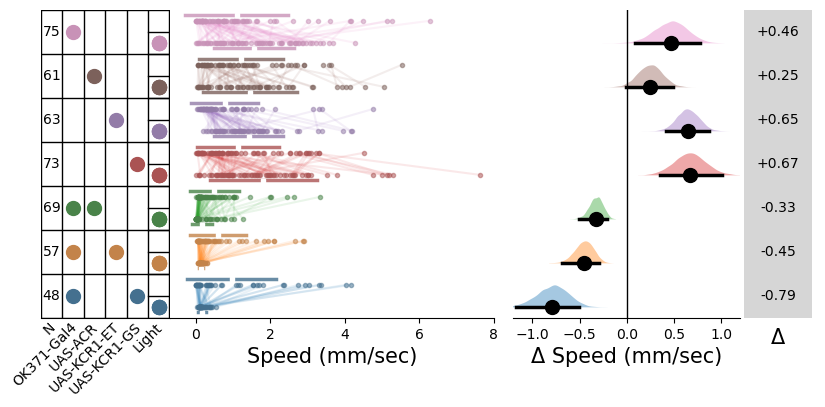

In [ ]:

fig = Horizontal_Plot(df1.fillna(0),order=('OK371 KCR1GS', 'OK371 KCR1OPT', 'OK371 ACR', 'UAS-KCR1GS','UAS-KCR1OPT','UAS-ACR', 'OK371-Gal4'),ind_var = 'Genotype',dep_var = 'Value',
paired=True,pair_col_name = 'Light', condition = ('Off', 'On'),idcol = 'Fly',swarm_axis_title = 'Speed (mm/sec)',contrast_axis_title='Δ Speed (mm/sec)', 
figsize=(10,4),main_width_ratio=(1.5,1),contrast_xlim=(-1.2,1.2),grid_key=True,constructs=['OK371-Gal4', 'UAS-ACR', 'UAS-KCR1-ET', 'UAS-KCR1-GS']);


# Key Grid

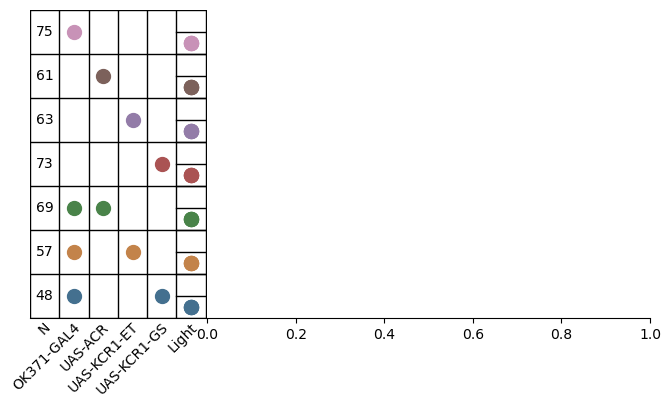

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib import gridspec

fig = plt.figure(figsize = (8, 4))

gs0 = gridspec.GridSpec(1, 2, width_ratios=(1,2.5), wspace=0) 
gs00 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gs0[0])
gs01 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gs0[1])

ax1 = fig.add_subplot(gs00[0])
ax2 = fig.add_subplot(gs01[0])

grid_key_plotter(ax1, df1, order=('OK371 KCR1GS', 'OK371 KCR1OPT', 'OK371 ACR', 'UAS-KCR1GS','UAS-KCR1OPT','UAS-ACR', 'OK371-Gal4'), ind_var='Genotype', 
                constructs=['OK371-GAL4', 'UAS-ACR', 'UAS-KCR1-ET', 'UAS-KCR1-GS'],paired=True,pair_title='Light',grid_key_labels_xpos=0.8,
                grid_key_opacity=1,custom_pal=None)

ax2.set_yticks([])
ax2.spines[['top', 'right','left']].set_color(None)




# Vertical format testing

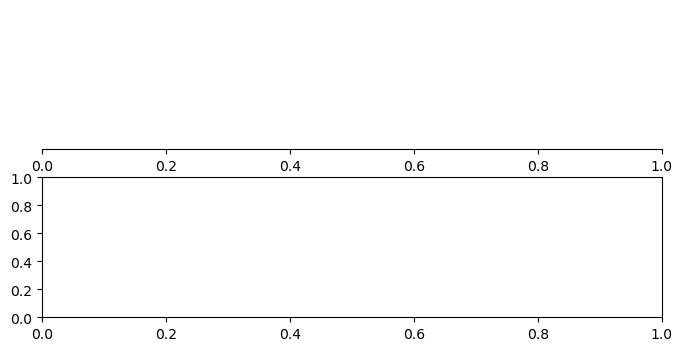

In [ ]:
fig = plt.figure(figsize = (8, 4))

gs0 = gridspec.GridSpec(2,1, wspace=0) 
gs00 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gs0[0])
gs01 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gs0[1])

ax1 = fig.add_subplot(gs00[0])
ax2 = fig.add_subplot(gs01[0])


ax1.set_yticks([])
ax1.spines[['top', 'right','left']].set_color(None)

